In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

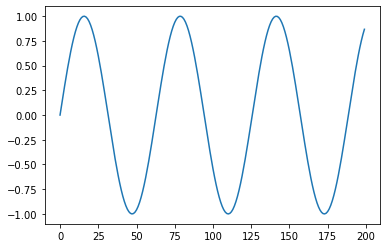

In [4]:
# creating synthetic data with no noise

series = np.sin(0.1*np.arange(200))
plt.plot(series)

In [8]:
# creating X & Y using a window of size 10.
T = 10
X = []
Y = []

# for loop to create the windows and the targets
for t in range(len(series) - T): # as the last window doesn't have values to predict
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(f"X Shape: {X.shape}\nY Shape: {Y.shape}\nN: {N}")

X Shape: (190, 10)
Y Shape: (190,)
N: 190


In [15]:
# using Autoregressive model
X_train, Y_train = X[:-N//2], Y[:-N//2]
X_valid, Y_valid = X[-N//2:], Y[-N//2:]

# building the model 
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

# train the model
history = model.fit(X_train, Y_train,
epochs=90, validation_data=(X_valid, Y_valid)
)

Epoch 1/90
3/3 [==============================] - 1s 233ms/step - loss: 1.9158 - val_loss: 0.1126
Epoch 2/90
3/3 [==============================] - 0s 14ms/step - loss: 0.3939 - val_loss: 0.7742
Epoch 3/90
3/3 [==============================] - 0s 12ms/step - loss: 0.8798 - val_loss: 0.4010
Epoch 4/90
3/3 [==============================] - 0s 17ms/step - loss: 0.1910 - val_loss: 0.0612
Epoch 5/90
3/3 [==============================] - 0s 12ms/step - loss: 0.1597 - val_loss: 0.2304
Epoch 6/90
3/3 [==============================] - 0s 16ms/step - loss: 0.3253 - val_loss: 0.1190
Epoch 7/90
3/3 [==============================] - 0s 12ms/step - loss: 0.1114 - val_loss: 0.0182
Epoch 8/90
3/3 [==============================] - 0s 18ms/step - loss: 0.0417 - val_loss: 0.1086
Epoch 9/90
3/3 [==============================] - 0s 16ms/step - loss: 0.1225 - val_loss: 0.0520
Epoch 10/90
3/3 [==============================] - 0s 20ms/step - loss: 0.0397 - val_loss: 0.0125
Epoch 11/90
3/3 [===========

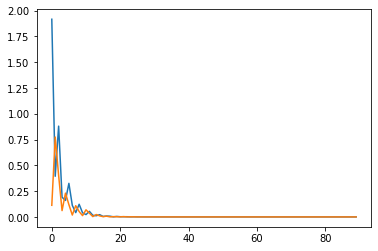

In [17]:
# plot loss for model per iteration
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

In [36]:
# forecasting
validation_predictions = []

# last train input (will be used at the first prediction only)
last_x = X[-N//2]
while len(validation_predictions) < len(Y_valid):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    validation_predictions.append(p)
    # making the new input or shifting the input
    last_x = np.roll(last_x,-1)
    # setting the prediction as the last value of
    last_x[-1] = p

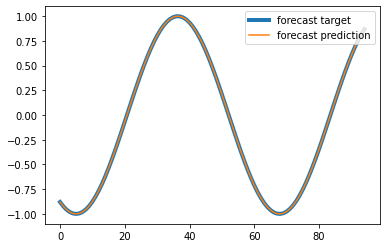

In [43]:
plt.plot(Y_valid, label='forecast target',linewidth=4)
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()